Universidad del Valle de Guatemala
Inteligencia Artificial
Javier Alvarez
18051

Primero importamos las librerias utiles para la manipulacion de la data y leemos el csv para almacenarlo detro de un p.array y extraemos la data que nos interesa, que en este caso es el precio y el espacio de vivienda.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split

data = pd.read_csv('kc_house_data.csv')
data_numpy = data.to_numpy()

price = np.array(data['price'])
sqft_living = np.array(data['sqft_living'])

Dividimos la data entre los los sets que nos sirven para entrenamiento  y que nuestro se adapte a datos desconocidos. Tambien agregamos el grado del polinomi que deseamos probar, en el cual me parecio razonable que fueran 20

In [10]:
sqft_living_train, sqft_living_test, price_train, price_test = train_test_split(sqft_living, price, test_size=0.2, random_state=420)

degrees = np.arange(1, 21)

Creamos variables que nos seran utiles para realizar la cross-validation y utilizamos esto junto con el grado del polinomio para entrenar y testear data, asi como calcular el error cuadratico y el score para la cross-validation

In [11]:
mse_scores = []
cv_scores = []

for degree in degrees:
    polinomio = PolynomialFeatures(degree=degree)
    X_train = polinomio.fit_transform(sqft_living_train.reshape(-1, 1))
    X_test = polinomio.transform(sqft_living_test.reshape(-1, 1))
    modelo = LinearRegression()
    
    modelo.fit(X_train, price_train)
    y_prediction = modelo.predict(X_test)
    mse_score = np.mean((y_prediction - price_test)**2)
    mse_scores.append(mse_score)
    
    cv_score = -np.mean(cross_val_score(modelo, X_train, price_train, cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

UTilizamos KFold para realizar la cross-validation con el grado de error más bajo y el score mas alto 

In [12]:
k_Fold = KFold(n_splits=5, shuffle=True, random_state=42)

best = np.argmin(mse_scores + cv_scores)
if best < len(mse_scores):
    best_degree = degrees[best]
else:
    best_degree = degrees[best - len(mse_scores)]

Dibujamos la curva y construimos la regresion que mejor se ajusta

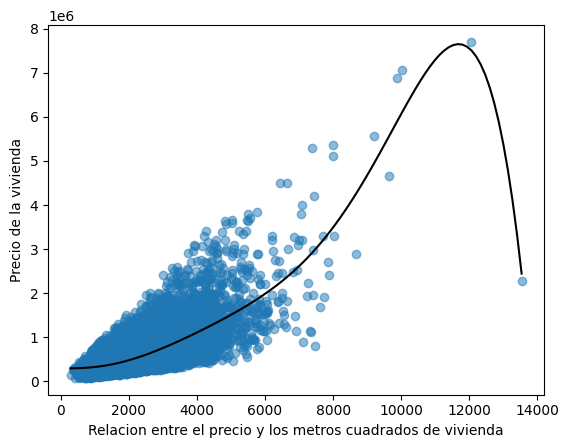

In [13]:
poly = PolynomialFeatures(degree=best_degree)
X_train = poly.fit_transform(sqft_living_train.reshape(-1, 1))
X_test = poly.transform(sqft_living_test.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train, price_train)

x_grid = np.linspace(np.min(sqft_living), np.max(sqft_living), 100).reshape(-1, 1)
X_grid = poly.transform(x_grid)
y_grid = model.predict(X_grid)

plt.scatter(sqft_living, price, alpha=0.5)
plt.plot(x_grid, y_grid, color='Black')
plt.xlabel('Relacion entre el precio y los metros cuadrados de vivienda')
plt.ylabel('Precio de la vivienda')
plt.show()

Como nos lo muestra la grafíca, a medida que aunmenta el espacio de vivienda, tambien aumenta el precio de venta, ya que estas dos variables estan relacionadas de una manera directa, pero como en todo set de datos . existen ciertos datos atipicos, como el que se puede observar que hace que la grafica baje de manera
repentina. 